In [53]:
pip install facenet-pytorch

In [54]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import numpy as np
import pandas as pd
import torch.nn as nn
import cv2
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image

# The model is running on CPU, since it is already pre-trained and doesnt require GPU
device = torch.device('cpu') 
print('Running on device: {}'.format(device))

#Define MTCNN module
#Since MTCNN is a collection of neural nets and other code, 
#The device must be passed in the following way to enable copying of objects when needed internally.
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, 
    device=device
)
#Function takes 2 vectors 'a' and 'b'
#Returns the cosine similarity according to the definition of the dot product
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

#cos_sim returns real numbers,where negative numbers have different interpretations.
#So we use this function to return only positive values.
def cos(a,b):
    minx = -1 
    maxx = 1
    return (cos_sim(a,b)- minx)/(maxx-minx)

# Define Inception Resnet V1 module (GoogLe Net)
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Define a dataset and data loader
dataset = datasets.ImageFolder('/content/drive/MyDrive/testset')
dataset.idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}
loader = DataLoader(dataset, collate_fn=lambda x: x[0])

#Perfom MTCNN facial detection
#Detects the face present in the image and prints the probablity of face detected in the image.
aligned = []
names = []
for x, y in loader:
    x_aligned, prob = mtcnn(x, return_prob=True)
    if x_aligned is not None:
        print('Face detected with probability: {:8f}'.format(prob))
        aligned.append(x_aligned)
        names.append(dataset.idx_to_class[y])

# Calculate the 512 face embeddings
aligned = torch.stack(aligned).to(device)
embeddings = resnet(aligned).cpu()

# Print distance matrix for classes.
#The embeddings are plotted in space and cosine distace is measured.
cos_sim = nn.CosineSimilarity(dim=-1, eps=1e-6)
for i in range(0,len(names)):
    emb=embeddings[i].unsqueeze(0)
    # The cosine similarity between the embeddings is given by 'dist'.
    dist =cos(embeddings[0],emb)  
        
dists = [[cos(e1,e2).item() for e2 in embeddings] for e1 in embeddings]
# The print statement below is
#Helpful for analysing the results and for determining the value of threshold.
print(pd.DataFrame(dists, columns=names, index=names))

Running on device: cpu
Face detected with probability: 0.999992
Face detected with probability: 0.999995
Face detected with probability: 0.999737
Face detected with probability: 0.999995
Face detected with probability: 0.999993
Face detected with probability: 0.999950
Face detected with probability: 0.999917
Face detected with probability: 0.999966
Face detected with probability: 1.000000
Face detected with probability: 0.999981
Face detected with probability: 0.999148
Face detected with probability: 0.999993
Face detected with probability: 0.999718
Face detected with probability: 0.999746
Face detected with probability: 0.999999
Face detected with probability: 0.999977
Face detected with probability: 0.999955
Face detected with probability: 0.999939
Face detected with probability: 0.999988
Face detected with probability: 0.999964
Face detected with probability: 0.998852
Face detected with probability: 0.999920
Face detected with probability: 0.999760
Face detected with probability: 0.

0001_0000305 tensor(0.6413, grad_fn=<DivBackward0>)


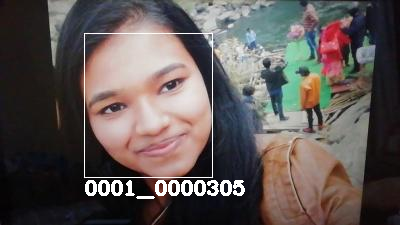

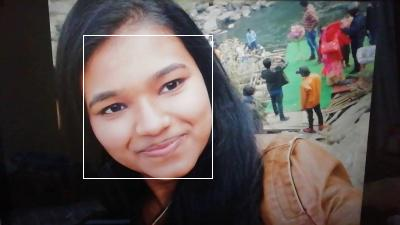

0001_0000305 tensor(0.6404, grad_fn=<DivBackward0>)


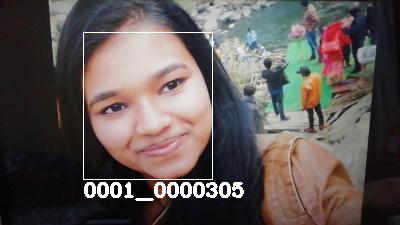

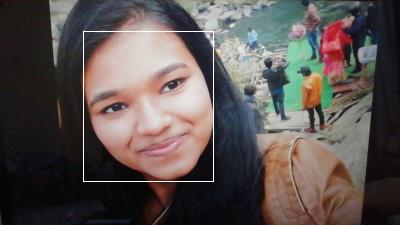

0001_0000305 tensor(0.6449, grad_fn=<DivBackward0>)


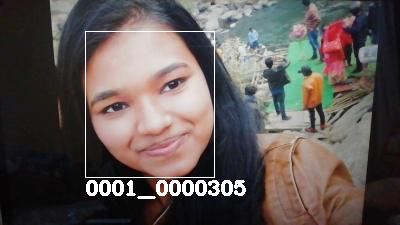

0001_0000305 tensor(0.6422, grad_fn=<DivBackward0>)
0010_0001613 tensor(0.6349, grad_fn=<DivBackward0>)


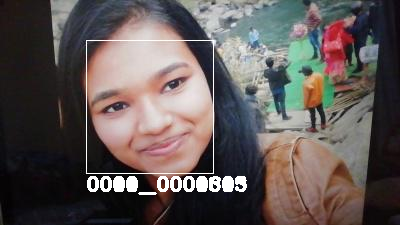

0001_0000305 tensor(0.6494, grad_fn=<DivBackward0>)


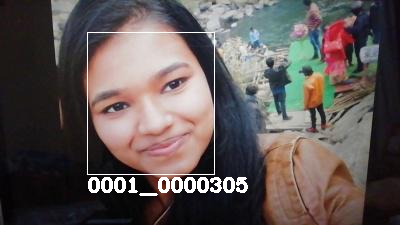

0001_0000305 tensor(0.6310, grad_fn=<DivBackward0>)


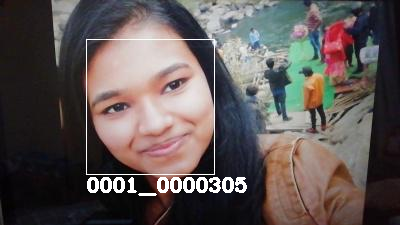

0001_0000305 tensor(0.6328, grad_fn=<DivBackward0>)


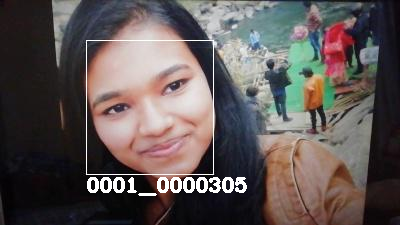

0001_0000305 tensor(0.6380, grad_fn=<DivBackward0>)


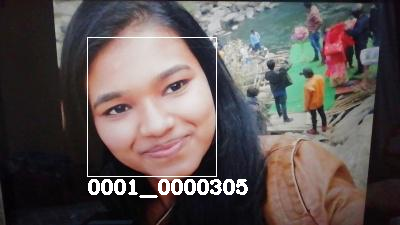

0001_0000305 tensor(0.6481, grad_fn=<DivBackward0>)


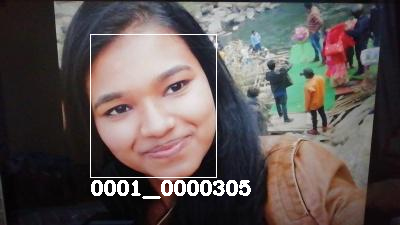

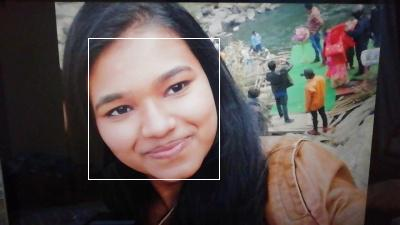

0001_0000305 tensor(0.6376, grad_fn=<DivBackward0>)


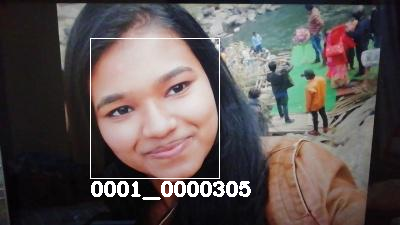

0001_0000305 tensor(0.6445, grad_fn=<DivBackward0>)


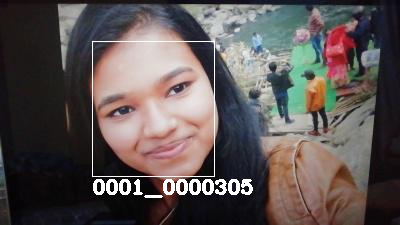

0001_0000305 tensor(0.6319, grad_fn=<DivBackward0>)


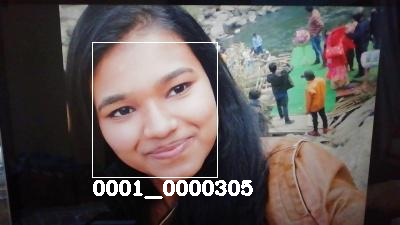

0001_0000305 tensor(0.6463, grad_fn=<DivBackward0>)


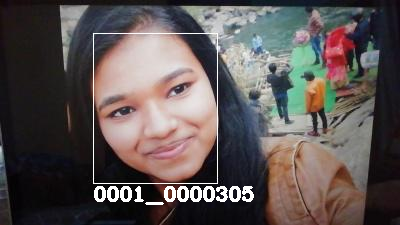

0001_0000305 tensor(0.6497, grad_fn=<DivBackward0>)


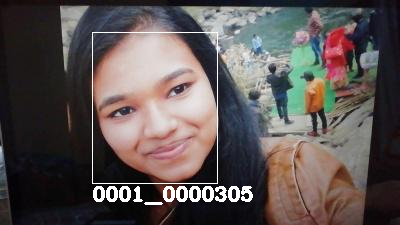

0001_0000305 tensor(0.6468, grad_fn=<DivBackward0>)


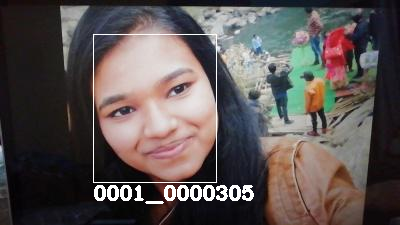

0001_0000305 tensor(0.6436, grad_fn=<DivBackward0>)


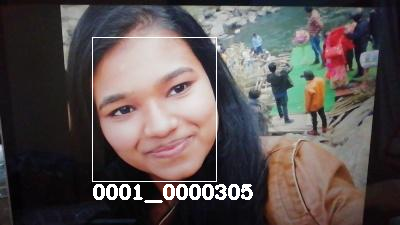

0001_0000305 tensor(0.6366, grad_fn=<DivBackward0>)


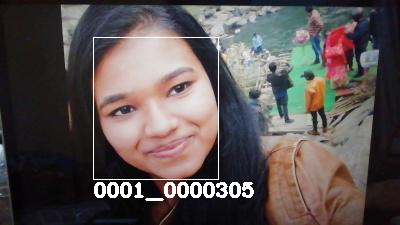

0001_0000305 tensor(0.6350, grad_fn=<DivBackward0>)


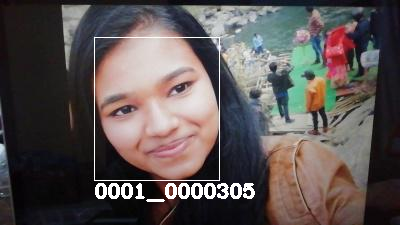

0001_0000305 tensor(0.6412, grad_fn=<DivBackward0>)


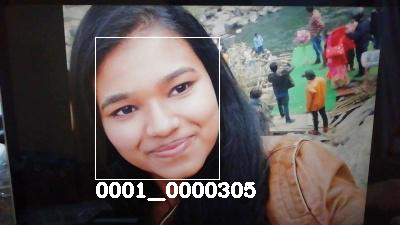

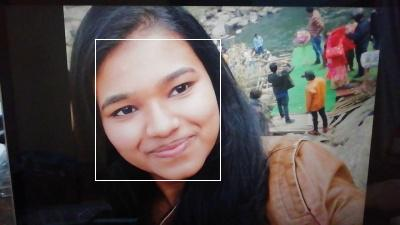

0001_0000305 tensor(0.6366, grad_fn=<DivBackward0>)


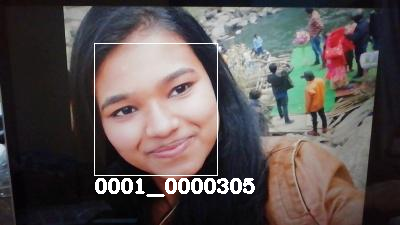

0001_0000305 tensor(0.6404, grad_fn=<DivBackward0>)


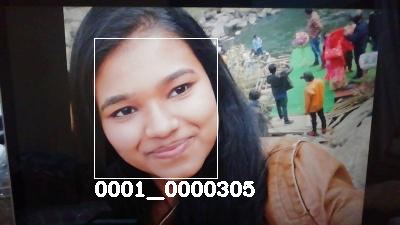

0001_0000305 tensor(0.6483, grad_fn=<DivBackward0>)


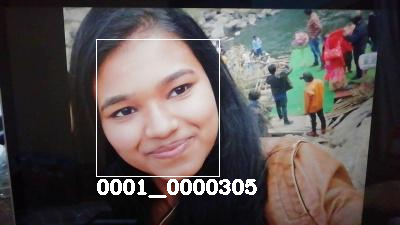

0001_0000305 tensor(0.6481, grad_fn=<DivBackward0>)


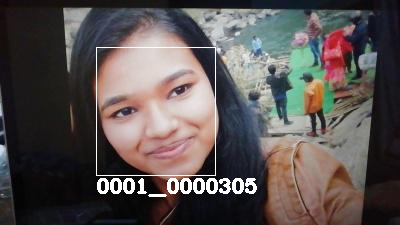

0001_0000305 tensor(0.6427, grad_fn=<DivBackward0>)


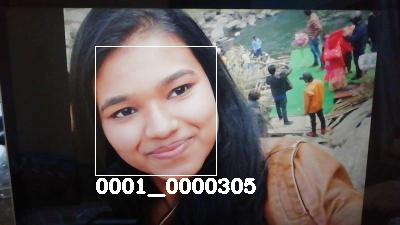

0001_0000305 tensor(0.6459, grad_fn=<DivBackward0>)


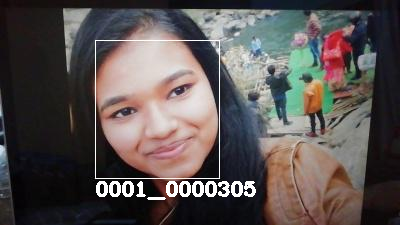

0001_0000305 tensor(0.6462, grad_fn=<DivBackward0>)


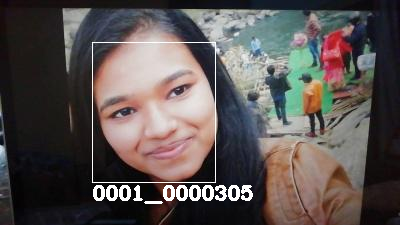

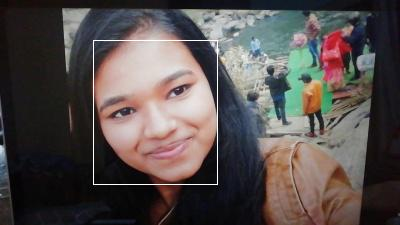

0001_0000305 tensor(0.6374, grad_fn=<DivBackward0>)


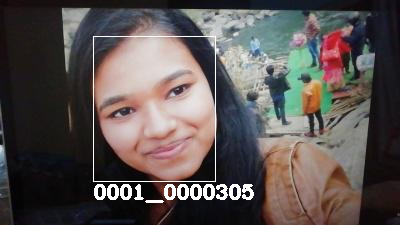

0001_0000305 tensor(0.6387, grad_fn=<DivBackward0>)


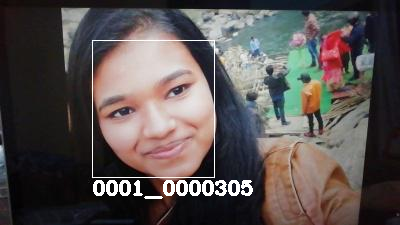

0001_0000305 tensor(0.6473, grad_fn=<DivBackward0>)


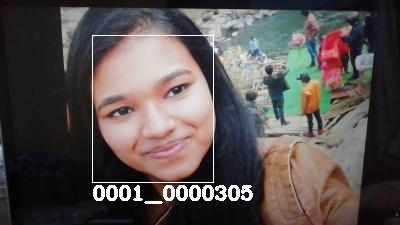

0001_0000305 tensor(0.6435, grad_fn=<DivBackward0>)


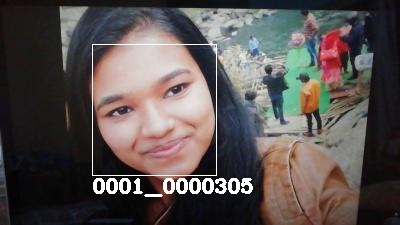

KeyboardInterrupt: ignored

In [89]:
from __future__ import print_function
from facenet_pytorch import MTCNN, InceptionResnetV1,extract_face
from PIL import Image,ImageDraw
import torch
import cv2
import os
import torch.nn as nn
from google.colab.patches import cv2_imshow
#from Web.imutils.video import WebcamVideoStream
#from Web.imutils.video import FPS
import imutils
from datetime import datetime


i = 1
# Haarcascade Classifier is used to detect faces through webcam. 
#It is preffered over MTCNN as it is faster. Real time basic applications needs to be fast.
classifier = cv2.CascadeClassifier('/content/drive/MyDrive/haar-cascade-files-master/haar-cascade-files-master/haarcascade_frontalface_default.xml')

#Takes 2 vectors 'a' and 'b' .
#Returns the cosine similarity according to the definition of the dot product.
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

#cos_sim returns real numbers,where negative numbers have different interpretations.
#So we use this function to return only positive values.
def cos(a,b):
    minx = -1 
    maxx = 1
    return (cos_sim(a,b)- minx)/(maxx-minx)

#This is the function for doing face recognition.
def verify(embedding):
    for i,k in enumerate(embeddings):
        for j,l in enumerate(embedding):
            #Computing Cosine distance.
            dist =cos(k,l)
            
            #Chosen threshold is 0.63
            #Threshold is determined after seeing the table in the previous cell.
            if dist > 0.63:
                type(dist)
                dist = str(dist)
                #Name of the person identified is printed on the screen, as well as below the detecetd face (below the rectangular box).
                text= names[i] 
                cv2.putText(ima, text,(boxes[j][0].astype(int),boxes[j][3].astype(int) + 17), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 2)
                print(text +" " + dist)
                markAttendance(text)

def markAttendance(name):
  with open('/content/attendance.csv','r+') as f:
    myDataList = f.readlines()
    nameList = []
    for line in myDataList:
      entry = line.split(',')
      nameList.append(entry[0])
    if name not in nameList:
      now = datetime.now()
      dtString = now.strftime('%H:%M:%S')
      f.writelines(f'\n{name},{dtString}')
        
#Model running on CPU           
device = torch.device('cpu')  

#Define Inception Resnet V1 module (GoogLe Net)                    
resnet = InceptionResnetV1(pretrained='vggface2').eval().to('cpu')

#Define MTCNN module
#Since MTCNN is a collection of neural nets and other code, 
#The device must be passed in the following way to enable copying of objects when needed internally.
#'keep_all' is kept True. All the faces present in the image will be detected.
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709,
    device=device,keep_all=True
)

#Camera is opened. Webcam video streaming starts.
cap=cv2.VideoCapture("/content/WhatsApp Video 2021-01-07 at 9.32.25 PM.mp4")
# Capture or input video frame-by-frame 
while True:
  _, im=cap.read()
  # Display the captured frame
  #cv2_imshow(frame)
  #try:
  #The resize function of imutils maintains the aspect ratio 
  #It provides the keyword arguments width and heightso the image can be resized to the intended width/height 
  frame = imutils.resize(im, width=400)
  
  #Detecting faces using Haarcascade classifier.
  faces = classifier.detectMultiScale(frame)
  path="/content/"
  #img_name = "image.jpg"
  #The captured image is saved.
  cv2.imwrite(os.path.join(path,img_name),frame)
  imgName="/content/image.jpg"
  
  # Get cropped and prewhitened image tensor
  img=Image.open(imgName)
  i=i+1
  img_cropped = mtcnn(img)
  boxes,prob=mtcnn.detect(img)
  img_draw = img.copy()
  draw = ImageDraw.Draw(img_draw)
  
  #Rectangular boxes are drawn on faces present in the image.
  #The detected and cropped faces are then saved.
  for i, box in enumerate(boxes):
      draw.rectangle(box.tolist())
      extract_face(img, box, save_path='/content/saved_img.jpg')
  img_draw.save('/content/Faces_Detected.jpg')
  ima=cv2.imread('/content/Faces_Detected.jpg')
  
  #Calculate embeddings of each cropped face.
  img_embedding = resnet(img_cropped)
  
  #Call function verify. 
  #Identify the person with the help of embeddings.
  cos_sim = nn.CosineSimilarity(dim=-1, eps=1e-6)
  verify(img_embedding)
  
  #'Detecting..' window opens.
  #Rectangular boxes are drawn on detected faces.
  #The identified faces have their respective name below the box.
  cv2_imshow(ima)
  

  # except:
  #   #In case 'try' doesn't work, "Get the image embedding" text is printed on the screen.
  #   #Run first cell
  #   text="Get the image embeddings"
  #   print(text)
  #   break 
        
  key = cv2.waitKey(0)
    
    #13 is for 'Enter' key.
    #If 'Enter' key is pressed, all the windows are made to close forcefully.
  if key ==13 & 0xFF == ord('q'):
      break    

cap.release()
cv2.destroyAllWindows() 
#vs.stop()
